<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/11%20Computer%20Vision/Face_Recognition_with_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Recognition with OpenCV

## 1. Algorithm

### 1.1 Viola-Jones Algorithm

*   A widely used method for real-time object detection.
*   Includes training phase and detection phase. Training is slow, but detection is very fast.


References: 


1.   Paul Viola & Michael Jones, 2001 [Rapid Object Detection using a Boosted Cascade of Simple Features](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.10.6807&rep=rep1&type=pdf)
2.   Kinh Tieu & Paul Viola, 2000 [Boosting Image Retrieval](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.136.2419&rep=rep1&type=pdf)
3.   Constantine P. Papageorgiou et al, 1998 [A General Framework for Object Detection](https://www.researchgate.net/publication/3766402_General_framework_for_object_detection)



### 1.2 Haar-like features
Haar features are sequence of rescaled square shape functions proposed by Alfred Haar in 1909. They are similar to convolution kernels taught in the Convolution Neural Networks course. These haar features are applied to all relevant parts of face to detect human face.

Here are some samples of Haar feature.


![Haar feature samples](https://github.com/jchen8000/MachineLearning/raw/master/11%20Computer%20Vision/images/haar%20features.jpg)


References:
1. [What are Haar Features used in Face Detection ?](https://medium.com/analytics-vidhya/what-is-haar-features-used-in-face-detection-a7e531c8332b)



## 2. Face Recognition with OpenCV

In [9]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

## 2.1 Load an image

*Note: all pictures/images here are downloaded from Royalty-Free & Copyright-Free website at https://burst.shopify.com/free-images*

In [25]:
#get an image from internet
#!wget 'https://cdn.pixabay.com/photo/2014/07/11/22/05/baby-390555_1280.jpg'
#!wget 'https://github.com/jchen8000/MachineLearning/raw/master/11%20Computer%20Vision/images/smiling-strong-woman-together.jpg'
#!wget 'https://github.com/jchen8000/MachineLearning/raw/master/11%20Computer%20Vision/images/smiling-family-on-merry-go-round.jpg'
#!wget 'https://github.com/jchen8000/MachineLearning/raw/master/11%20Computer%20Vision/images/people-girl-design-happy-35188.jpg'
!wget 'https://raw.githubusercontent.com/jchen8000/MachineLearning/master/11%20Computer%20Vision/images/four-friends.jpg'
!ls

--2020-06-30 14:54:48--  https://raw.githubusercontent.com/jchen8000/MachineLearning/master/11%20Computer%20Vision/images/four-friends.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104127 (102K) [image/jpeg]
Saving to: ‘four-friends.jpg.1’

four-friends.jpg.1  100%[===================>] 101.69K  --.-KB/s    in 0.04s   

2020-06-30 14:54:48 (2.70 MB/s) - ‘four-friends.jpg.1’ saved [104127/104127]

four-friends.jpg		     sample_data
four-friends.jpg.1		     smiling-family-on-merry-go-round.jpg
haarcascade_eye.xml		     smiling-strong-woman-together.jpg
haarcascade_frontalface_default.xml  smiling-strong-woman-together.jpg.1
people-girl-design-happy-35188.jpg


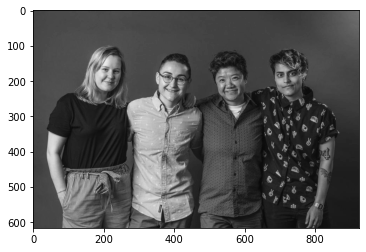

In [26]:
#  Loading the image to be tested
#test_image = cv2.imread('baby-390555_1280.jpg')
#test_image = cv2.imread('smiling-strong-woman-together.jpg')
#test_image = cv2.imread('smiling-family-on-merry-go-round.jpg')
#test_image = cv2.imread('people-girl-design-happy-35188.jpg')
test_image = cv2.imread('four-friends.jpg')

# Converting to grayscale as opencv expects detector takes in input gray scale images
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying grayscale image
plt.imshow(test_image_gray, cmap='gray')

## 2.2 Load the Haar classifier cascade files

In [ ]:
!wget 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
!wget 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml'
!ls

--2020-06-29 19:57:41--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2020-06-29 19:57:41 (15.3 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2020-06-29 19:57:42--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.


In [15]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
haar_cascade_eye = cv2.CascadeClassifier('haarcascade_eye.xml')

## 2.3 Detect the face and draw rectangle on original image

In [13]:
def detect_face_and_eye(gray, original):
  faces = haar_cascade_face.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 5)
  print('Faces found: ', len(faces))
  for (x,y,w,h) in faces:
     cv2.rectangle(original, (x, y), (x+w, y+h), (0, 255, 0), 8)
     roi_gray = gray[y:y+h, x:x+w]
     roi_color = original[y:y+h, x:x+w]
     eyes = haar_cascade_eye.detectMultiScale(roi_gray, scaleFactor = 1.1, minNeighbors = 3)
     print('Eyes found: ', len(eyes))
     for(ex, ey, ew, eh) in eyes:
       cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 128, 0), 4)
  return original

Faces found:  4
Eyes found:  1
Eyes found:  2
Eyes found:  2
Eyes found:  2


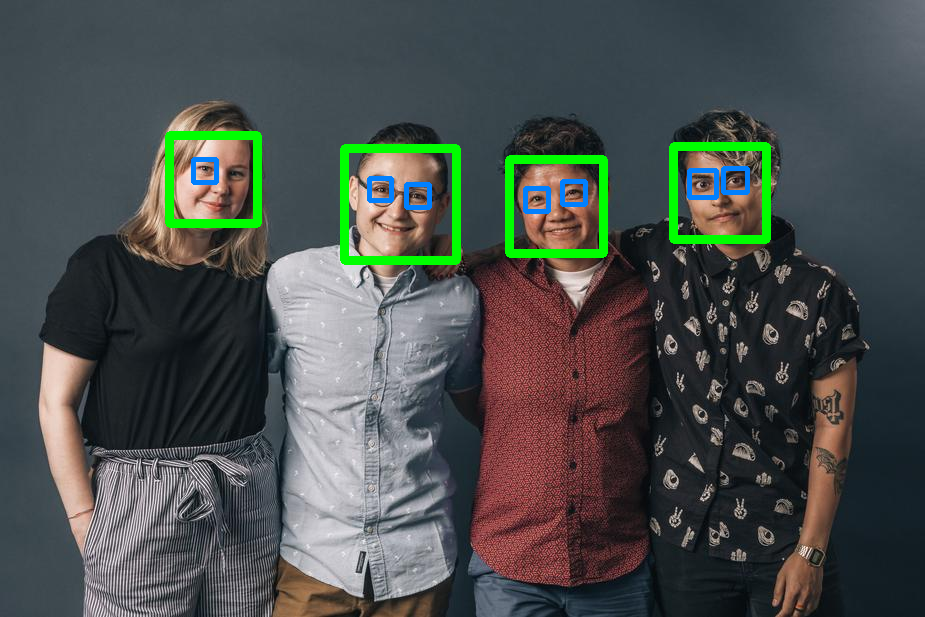

In [27]:
detect_face_and_eye(test_image_gray, test_image)
cv2_imshow(test_image)
#plt.imshow(test_image)